In [1]:
import pandas as pd

In [3]:
import numpy as np


In [4]:
df = pd.read_csv('smsspamcollection.tsv',sep='\t')

In [5]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [7]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [8]:
len(df)

5572

In [9]:
df['label']

0        ham
1        ham
2       spam
3        ham
4        ham
5       spam
6        ham
7        ham
8       spam
9       spam
10       ham
11      spam
12      spam
13       ham
14       ham
15      spam
16       ham
17       ham
18       ham
19      spam
20       ham
21       ham
22       ham
23       ham
24       ham
25       ham
26       ham
27       ham
28       ham
29       ham
        ... 
5542     ham
5543     ham
5544     ham
5545     ham
5546     ham
5547    spam
5548     ham
5549     ham
5550     ham
5551     ham
5552     ham
5553     ham
5554     ham
5555     ham
5556     ham
5557     ham
5558     ham
5559     ham
5560     ham
5561     ham
5562     ham
5563     ham
5564     ham
5565     ham
5566    spam
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: label, Length: 5572, dtype: object

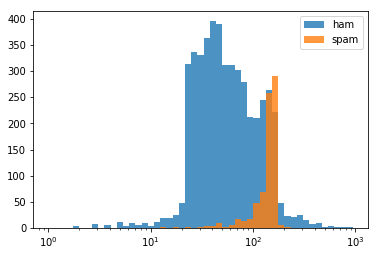

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.xscale('log')
bins = 1.15**(np.arange(0,50))
plt.hist(df[df['label']=='ham']['length'],bins=bins,alpha=0.8)
plt.hist(df[df['label']=='spam']['length'],bins=bins,alpha=0.8)
plt.legend(('ham','spam'))
plt.show()

In [11]:
from sklearn.model_selection import train_test_split


In [12]:
X = df[['length','punct']]  
y = df['label']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)


In [14]:
from sklearn.linear_model import LogisticRegression
classiifer = LogisticRegression()

In [16]:
classiifer.fit(X_train,y_train)

C:\Users\Acer\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [17]:
from sklearn import metrics

In [19]:
y_pred = classiifer.predict(X_test)

In [20]:
print(metrics.confusion_matrix(y_test,y_pred))

[[1562   54]
 [ 220    3]]


In [22]:
df = pd.DataFrame(metrics.confusion_matrix(y_test,y_pred), index=['ham','spam'], columns=['ham','spam'])


In [23]:
df

,ham,spam
ham,1562,54
spam,220,3


In [25]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.88      0.97      0.92      1616
        spam       0.05      0.01      0.02       223

   micro avg       0.85      0.85      0.85      1839
   macro avg       0.46      0.49      0.47      1839
weighted avg       0.78      0.85      0.81      1839



In [26]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()

nb_model.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [27]:
predictions = nb_model.predict(X_test)
print(metrics.confusion_matrix(y_test,predictions))

[[1609    7]
 [ 219    4]]


In [28]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

         ham       0.88      1.00      0.93      1616
        spam       0.36      0.02      0.03       223

   micro avg       0.88      0.88      0.88      1839
   macro avg       0.62      0.51      0.48      1839
weighted avg       0.82      0.88      0.83      1839



In [29]:
from sklearn.svm import SVC
svc_model = SVC(gamma='auto')
svc_model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [30]:
predictions = svc_model.predict(X_test)
print(metrics.confusion_matrix(y_test,predictions))

[[1552   64]
 [ 121  102]]
